## Objective: 

### The goal of this project is to predict the fare of a taxi trip given information about the pickup and dropoff location, pick datetime and number of passengers travelling.

In [1]:
#Importing required libraries
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score   

%matplotlib inline

In [2]:
#Loading the data:
train  = pd.read_csv("Desktop/test/train.csv")

## Understanding the data :

In [3]:
train.head() #checking first five rows of the training dataset

key  fare_amount          pickup_datetime  \
0    2010-06-15 22:37:37.0000002          6.1  2010-06-15 22:37:37 UTC   
1   2012-01-15 05:05:00.00000038          5.3  2012-01-15 05:05:00 UTC   
2    2014-08-08 13:41:56.0000002         11.0  2014-08-08 13:41:56 UTC   
3  2011-02-15 13:54:00.000000178          6.5  2011-02-15 13:54:00 UTC   
4    2011-06-03 15:41:06.0000002          8.1  2011-06-03 15:41:06 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.987103        40.736700         -73.979968         40.722660   
1        -73.945183        40.802335         -73.940880         40.792632   
2        -73.981187        40.781080         -73.952317         40.775680   
3        -73.994452        40.740643         -73.988440         40.752680   
4        -73.969300        40.759800         -73.988000         40.731900   

   passenger_count  
0                1  
1                5  
2                2  
3                3  
4                0

In [4]:
train.drop('key',axis=1,inplace=True)

In [5]:
print("shape of training data is: ",train.shape) #checking the number of rows and columns in training data

shape of training data is:  (13005478, 7)


In [6]:
train.dtypes #checking the data-types in training dataset

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Here we can see pickup datetime and fare amount is of object type. So we need to change the data type of both.

In [7]:
train.describe() 

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  1.300548e+07      1.300548e+07     1.300548e+07       1.300539e+07   
mean   1.133957e+01     -7.251155e+01     3.992273e+01      -7.251334e+01   
std    9.835297e+00      1.280082e+01     9.273872e+00       1.286023e+01   
min   -3.000000e+02     -3.439245e+03    -3.475482e+03      -3.428044e+03   
25%    6.000000e+00     -7.399207e+01     4.073493e+01      -7.399139e+01   
50%    8.500000e+00     -7.398181e+01     4.075265e+01      -7.398014e+01   
75%    1.250000e+01     -7.396707e+01     4.076713e+01      -7.396368e+01   
max    3.130300e+03      3.454855e+03     3.352849e+03       3.445035e+03   

       dropoff_latitude  passenger_count  
count      1.300539e+07     1.300548e+07  
mean       3.992424e+01     1.685242e+00  
std        9.566211e+00     1.324736e+00  
min       -3.475482e+03     0.000000e+00  
25%        4.073403e+01     1.000000e+00  
50%        4.075316e+01     1.000000e+00  
75%        4.076809e+01     2.000000e+00  
max        3.351468e+03     2.080000e+02

## Data Cleaning & Missing Value Analysis :

In [8]:
#Convert fare_amount from object to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [9]:
train.dropna(subset= ["pickup_datetime"])   #dropping NA values in datetime column

fare_amount          pickup_datetime  pickup_longitude  \
0                 6.1  2010-06-15 22:37:37 UTC        -73.987103   
1                 5.3  2012-01-15 05:05:00 UTC        -73.945183   
2                11.0  2014-08-08 13:41:56 UTC        -73.981187   
3                 6.5  2011-02-15 13:54:00 UTC        -73.994452   
4                 8.1  2011-06-03 15:41:06 UTC        -73.969300   
...               ...                      ...               ...   
13005473         15.3  2009-09-17 17:30:59 UTC        -73.946428   
13005474          5.7  2012-04-03 23:07:16 UTC        -73.983584   
13005475          5.3  2009-06-18 19:17:00 UTC        -73.994840   
13005476          5.7  2011-02-28 20:42:00 UTC        -73.994842   
13005477          4.0  2013-06-08 23:37:44 UTC        -74.003360   

          pickup_latitude  dropoff_longitude  dropoff_latitude  \
0               40.736700         -73.979968         40.722660   
1               40.802335         -73.940880         40.792632   
2               40.781080         -73.952317         40.775680   
3               40.740643         -73.988440         40.752680   
4               40.759800         -73.988000         40.731900   
...                   ...                ...               ...   
13005473        40.772953         -73.999922         40.738704   
13005474        40.725945         -73.992779         40.717914   
13005475        40.739113         -73.996813         40.744558   
13005476        40.760165         -73.980780         40.778217   
13005477        40.727060         -73.999785         40.734316   

          passenger_count  
0                       1  
1                       5  
2                       2  
3                       3  
4                       0  
...                   ...  
13005473                1  
13005474                1  
13005475                2  
13005476                2  
13005477                1  

[13005478 rows x 7 columns]

In [11]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [12]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour

In [13]:
train.dtypes #Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
dtype: object

#### Observations :

1. Passenger count should not exceed 6(even if we consider SUV)
2. Latitudes range from -90 to 90. Longitudes range from -180 to 180
3. Few missing values and High values of fare and Passenger count are present. So, decided to remove them.

Checking the passenger count variable : 

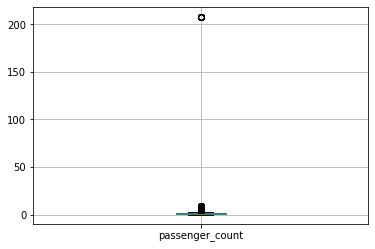

In [14]:
train[['passenger_count']].boxplot();

In [15]:
train["passenger_count"].describe()

count    1.300548e+07
mean     1.685242e+00
std      1.324736e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [16]:
train["passenger_count"].max()

208

In [17]:
train = train.drop(train[train["passenger_count"] ==208 ].index, axis=0)

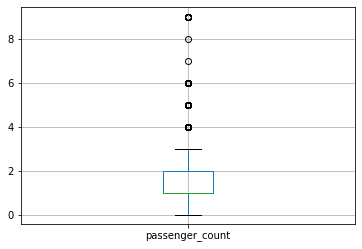

In [18]:
train[['passenger_count']].boxplot();

In [19]:
train["passenger_count"].value_counts()

1    8994399
2    1921362
5     922488
3     569656
4     276098
6     275274
0      46176
9         10
8          1
7          1
Name: passenger_count, dtype: int64

In [20]:
train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [21]:
train["passenger_count"].value_counts()

1    8994399
2    1921362
5     922488
3     569656
4     276098
6     275274
0      46176
Name: passenger_count, dtype: int64

In [22]:
#Also removing the values with passenger count of 0.
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [23]:
train["passenger_count"].describe()

count    1.295928e+07
mean     1.691033e+00
std      1.307013e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [24]:
print(train['passenger_count'].isnull().sum())

0


In [25]:
print(train.shape)

(12959277, 12)


Next checking the Fare Amount variable :

In [26]:
##finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

506793      3130.30
7294982     2004.50
12872593     957.00
3893276      900.00
9400995      724.21
             ...   
5462396      -95.00
2466532     -107.75
5235270     -145.00
7887685     -176.00
466269      -300.00
Name: fare_amount, Length: 12959277, dtype: float64

In [27]:
Counter(train["fare_amount"]<0)

Counter({False: 12958670, True: 607})

In [28]:
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train.shape

(12958670, 12)

In [29]:
##make sure there is no negative values in the fare_amount variable column
train["fare_amount"].describe()

count    1.295867e+07
mean     1.134885e+01
std      9.841956e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      3.130300e+03
Name: fare_amount, dtype: float64

<AxesSubplot:>

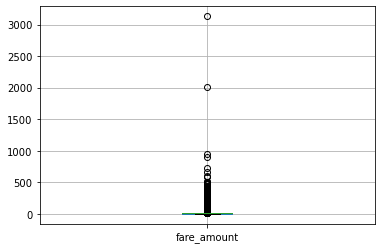

In [30]:
train[["fare_amount"]].boxplot()

In [31]:
Counter(train["fare_amount"]>1000)

Counter({False: 12958668, True: 2})

In [32]:
train = train.drop(train[train["fare_amount"]>1000].index, axis=0)

<AxesSubplot:>

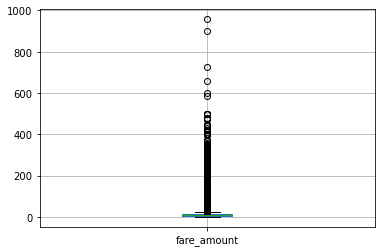

In [33]:
train[["fare_amount"]].boxplot()

In [52]:
Counter(train["fare_amount"]>80)

Counter({False: 12946142, True: 7688})

In [53]:
train = train.drop(train[train["fare_amount"]> 80 ].index, axis=0)
train.shape

(12946142, 12)

<AxesSubplot:>

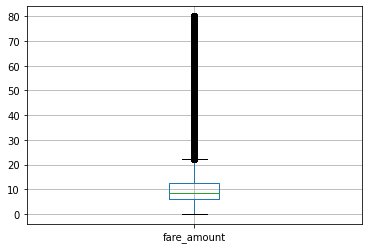

In [54]:
train[["fare_amount"]].boxplot()

In [58]:
Counter(train["fare_amount"]>22)

Counter({False: 11827798, True: 1118344})

In [59]:
train = train.drop(train[train["fare_amount"]> 22 ].index, axis=0)
train.shape

(11827798, 12)

<AxesSubplot:>

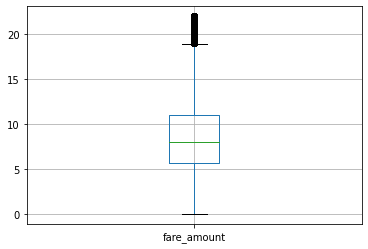

In [60]:
train[["fare_amount"]].boxplot()

In [61]:
Counter(train["fare_amount"]>18)

Counter({False: 11341486, True: 486312})

In [62]:
train = train.drop(train[train["fare_amount"]> 18].index, axis=0)
train.shape

(11341486, 12)

<AxesSubplot:>

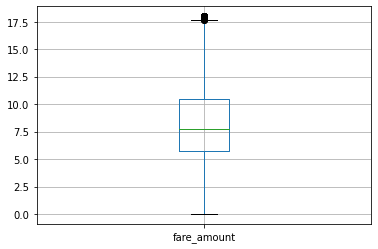

In [63]:
train[["fare_amount"]].boxplot()

In [64]:
Counter(train["fare_amount"]>17.5)

Counter({False: 11260299, True: 81187})

In [65]:
train = train.drop(train[train["fare_amount"]> 17.5].index, axis=0)
train.shape

(11260299, 12)

<AxesSubplot:>

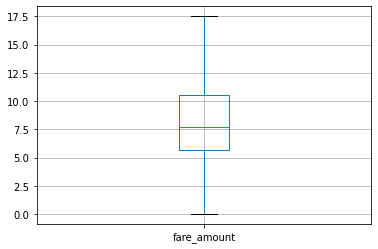

In [66]:
train[["fare_amount"]].boxplot()

In [68]:
Counter(train["fare_amount"]<1)

Counter({False: 11259837, True: 462})

In [69]:
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(11259837, 12)

<AxesSubplot:>

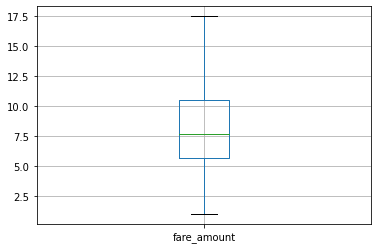

In [70]:
train[["fare_amount"]].boxplot()

In [71]:
train["fare_amount"].sort_values(ascending=False)

3957553     17.5
9776108     17.5
1497361     17.5
2793533     17.5
5848888     17.5
            ... 
3025646      1.0
4567660      1.0
12705481     1.0
6616308      1.0
2107228      1.0
Name: fare_amount, Length: 11259837, dtype: float64

In [72]:
# eliminating rows for which value of "fare_amount" is missing
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(11259837, 12)
0


In [73]:
train["fare_amount"].describe()

count    1.125984e+07
mean     8.380474e+00
std      3.424016e+00
min      1.000000e+00
25%      5.700000e+00
50%      7.700000e+00
75%      1.050000e+01
max      1.750000e+01
Name: fare_amount, dtype: float64

Now checking the pickup lattitude and longitude :

In [74]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
47947            14.1 2011-10-15 15:47:00        -73.974778       406.216667   
137518            7.0 2013-01-31 15:38:00          0.000000      2041.240317   
200417            6.9 2011-10-17 21:30:00        -73.975193       404.850000   
249723            7.7 2011-08-24 21:48:00       1121.371622       330.129795   
522439            6.9 2012-05-16 15:53:00          0.000000       404.570000   
...               ...                 ...               ...              ...   
12619142          8.1 2011-08-29 16:49:00       2495.717683       869.816458   
12633297          6.1 2011-06-24 22:25:00        420.913503       535.642890   
12754085          6.5 2009-06-06 21:31:00        -73.842212       615.310293   
12786327          3.7 2012-03-25 02:49:00       2084.697707       899.232937   
12819211          4.5 2012-04-26 19:22:00        -73.957960       404.066667   

          dropoff_longitude  dropoff_latitude  passenger_count  year  Month  \
47947            -73.963827         40.792837                1  2011     10   
137518           -73.978397         40.759842                1  2013      1   
200417           -73.983833         40.769717                6  2011     10   
249723          1754.725060       -427.646528                1  2011      8   
522439             0.000000         40.711262                6  2012      5   
...                     ...               ...              ...   ...    ...   
12619142        2495.717683        869.816458                1  2011      8   
12633297       -2245.254872       2993.515333                1  2011      6   
12754085         -73.842212        615.310293                1  2009      6   
12786327       -1326.667547      -2849.085388                1  2012      3   
12819211         -73.948017         40.773015                1  2012      4   

          Date  Day  Hour  
47947       15    5    15  
137518      31    3    15  
200417      17    0    21  
249723      24    2    21  
522439      16    2    15  
...        ...  ...   ...  
12619142    29    0    16  
12633297    24    4    22  
12754085     6    5    21  
12786327    25    6     2  
12819211    26    3    19  

[139 rows x 12 columns]

In [75]:
#Hence dropping one value of >90
train.drop((train[train['pickup_latitude']<-90]).index, axis=0,inplace=True)
train.drop((train[train['pickup_latitude']>90]).index, axis=0,inplace=True)

In [76]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
731504            8.1 2011-10-06 07:31:00        787.246387       -80.880182   
2542307          10.5 2011-08-18 00:01:00        757.866575       -80.926848   
4049306          16.9 2011-06-04 07:09:00       3383.517112       -86.502535   
4418465          16.1 2011-05-02 08:53:00       2084.694373       -19.364388   
8190466          17.3 2011-09-07 22:42:00       1547.815547       -79.458763   
8198015           5.7 2011-07-01 08:53:00       1662.459703       -44.548278   
9305077           5.3 2011-09-04 19:23:00       2157.301527       -50.152285   
12838791          3.7 2011-10-25 20:05:00       3454.854513       -47.297782   

          dropoff_longitude  dropoff_latitude  passenger_count  year  Month  \
731504           787.246387        -80.880182                1  2011     10   
2542307         -554.935360       3351.403027                1  2011      8   
4049306         1124.202792        291.055042                1  2011      6   
4418465        -2653.507012        682.431815                1  2011      5   
8190466         1547.815547        -79.458763                1  2011      9   
8198015          402.768385       -402.454305                1  2011      7   
9305077         2157.301527        -50.152285                1  2011      9   
12838791        2101.491407      -2889.644893                1  2011     10   

          Date  Day  Hour  
731504       6    3     7  
2542307     18    3     0  
4049306      4    5     7  
4418465      2    0     8  
8190466      7    2    22  
8198015      1    4     8  
9305077      4    6    19  
12838791    25    1    20

In [77]:
#Hence dropping one value of >90
train.drop((train[train['pickup_longitude']<-180]).index, axis=0,inplace=True)
train.drop((train[train['pickup_longitude']>180]).index, axis=0, inplace=True)

In [78]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
34895             7.3 2011-09-25 12:12:00        -73.969250        40.798597   
235347            8.9 2012-04-07 18:54:00        -73.991532        40.742245   
490252            8.1 2010-08-22 17:50:00        -73.873002        40.774092   
577454            6.1 2011-10-29 16:13:00        -73.982320        40.775140   
761931            6.1 2012-04-23 22:43:00        -73.974882        40.755162   
...               ...                 ...               ...              ...   
11680849          3.3 2011-11-19 21:33:00        -74.006125        40.734537   
12048310          4.5 2012-06-01 22:33:00        -74.013132        40.715597   
12382098          6.1 2012-03-09 10:02:00        -73.982415        40.735777   
12941539         10.5 2012-05-03 19:25:00        -73.988972        40.773705   
12948563          4.5 2011-11-17 16:52:00         -1.100000         0.000000   

          dropoff_longitude  dropoff_latitude  passenger_count  year  Month  \
34895            -73.957567         95.633333                1  2011      9   
235347             0.000000        473.987042                1  2012      4   
490252           -73.959275        404.700000                1  2010      8   
577454           -73.960860        406.033332                1  2011     10   
761931           -73.978817        404.733332                1  2012      4   
...                     ...               ...              ...   ...    ...   
11680849         -74.008230        414.050000                1  2011     11   
12048310          -0.066667        234.054000                1  2012      6   
12382098         -73.971752        404.883332                1  2012      3   
12941539         -73.954950        404.116667                2  2012      5   
12948563           0.000000        400.191755                1  2011     11   

          Date  Day  Hour  
34895       25    6    12  
235347       7    5    18  
490252      22    6    17  
577454      29    5    16  
761931      23    0    22  
...        ...  ...   ...  
11680849    19    5    21  
12048310     1    4    22  
12382098     9    4    10  
12941539     3    3    19  
12948563    17    3    16  

[76 rows x 12 columns]

In [79]:
train.drop((train[train['dropoff_latitude']<-90]).index, axis=0,inplace=True)
train.drop((train[train['dropoff_latitude']>90]).index, axis=0,inplace=True)

In [80]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
12512436          6.5 2013-06-19 09:09:00        -73.977688        40.753748   

          dropoff_longitude  dropoff_latitude  passenger_count  year  Month  \
12512436         636.662867         40.761505                6  2013      6   

          Date  Day  Hour  
12512436    19    2     9

In [81]:
train.drop((train[train['dropoff_longitude']<-180]).index, axis=0,inplace=True)
train.drop((train[train['dropoff_longitude']>180]).index, axis=0,inplace=True)

In [82]:
train.shape

(11259269, 12)

In [83]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
dtype: int64

### Now we have successfully cleared our both datasets. Thus proceeding for further operations:

Calculating distance based on the given coordinates :


In [85]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min 

In [86]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [87]:
train.head()

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
0          6.1 2010-06-15 22:37:37        -73.987103        40.736700   
1          5.3 2012-01-15 05:05:00        -73.945183        40.802335   
2         11.0 2014-08-08 13:41:56        -73.981187        40.781080   
3          6.5 2011-02-15 13:54:00        -73.994452        40.740643   
5          4.1 2012-05-03 08:42:00        -73.991595        40.754535   

   dropoff_longitude  dropoff_latitude  passenger_count  year  Month  Date  \
0         -73.979968         40.722660                1  2010      6    15   
1         -73.940880         40.792632                5  2012      1    15   
2         -73.952317         40.775680                2  2014      8     8   
3         -73.988440         40.752680                3  2011      2    15   
5         -73.983505         40.751178                1  2012      5     3   

   Day  Hour  distance  
0    1    22  1.672942  
1    6     5  1.138102  
2    4    13  2.503956  
3    1    13  1.431069  
5    3     8  0.776991

In [88]:
train.nunique()

fare_amount               598
pickup_datetime       7066834
pickup_longitude       189590
pickup_latitude        232130
dropoff_longitude      208444
dropoff_latitude       256078
passenger_count             6
year                        7
Month                      12
Date                       31
Day                         7
Hour                       24
distance             10934713
dtype: int64

<AxesSubplot:>

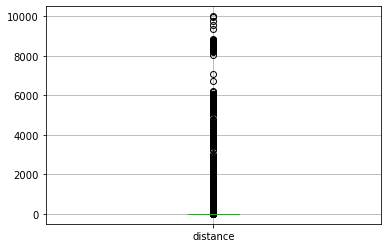

In [89]:
train[["distance"]].boxplot()

In [91]:
Counter(train["distance"]>500)

Counter({False: 11239333, True: 19936})

In [92]:
#we will remove the rows whose distance values is very high which is more than 80kms
train = train.drop(train[train['distance'] > 500 ].index, axis=0)
train.shape

(11239333, 13)

<AxesSubplot:>

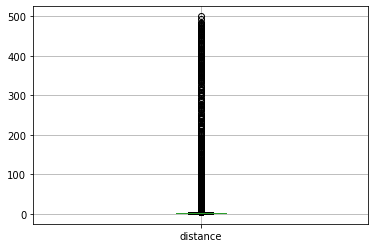

In [93]:
train[["distance"]].boxplot()

In [94]:
Counter(train["distance"]>30)

Counter({False: 11236018, True: 3315})

In [95]:
#we will remove the rows whose distance values is very high which is more than 80kms
train = train.drop(train[train['distance'] > 30 ].index, axis=0)
train.shape

(11236018, 13)

<AxesSubplot:>

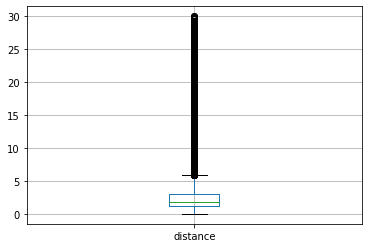

In [96]:
train[["distance"]].boxplot()

In [98]:
Counter(train["distance"]>8)

Counter({False: 11187548, True: 48470})

In [99]:
train = train.drop(train[train['distance'] > 8 ].index, axis=0)
train.shape

(11187548, 13)

<AxesSubplot:>

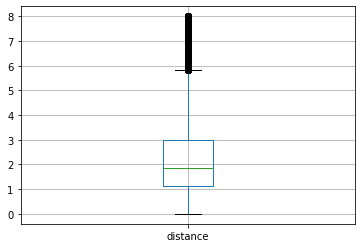

In [100]:
train[["distance"]].boxplot()

In [101]:
Counter(train["distance"]>6)

Counter({False: 10885973, True: 301575})

In [102]:
train = train.drop(train[train['distance'] > 6 ].index, axis=0)
train.shape

(10885973, 13)

<AxesSubplot:>

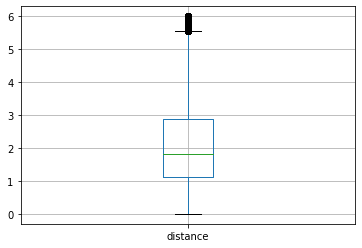

In [103]:
train[["distance"]].boxplot()

In [105]:
Counter(train['distance'] == 0)

Counter({False: 10563595, True: 322378})

In [106]:
###we will remove the rows whose distance value is zero

train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(10563595, 13)

<AxesSubplot:>

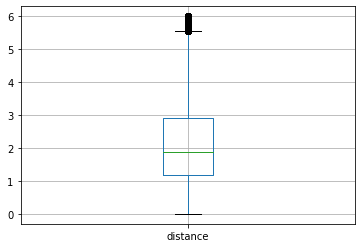

In [107]:
train[["distance"]].boxplot()

In [111]:
Counter(train["distance"]>5.3)

Counter({False: 10286916, True: 90611})

In [112]:
train = train.drop(train[train['distance'] > 5.3 ].index, axis=0)
train.shape

(10286916, 13)

<AxesSubplot:>

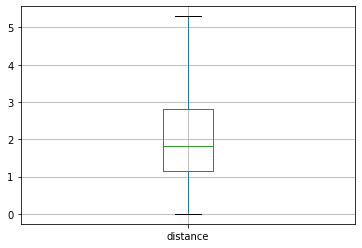

In [113]:
train[["distance"]].boxplot()

In [114]:
train.head()

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
0          6.1 2010-06-15 22:37:37        -73.987103        40.736700   
1          5.3 2012-01-15 05:05:00        -73.945183        40.802335   
2         11.0 2014-08-08 13:41:56        -73.981187        40.781080   
3          6.5 2011-02-15 13:54:00        -73.994452        40.740643   
5          4.1 2012-05-03 08:42:00        -73.991595        40.754535   

   dropoff_longitude  dropoff_latitude  passenger_count  year  Month  Date  \
0         -73.979968         40.722660                1  2010      6    15   
1         -73.940880         40.792632                5  2012      1    15   
2         -73.952317         40.775680                2  2014      8     8   
3         -73.988440         40.752680                3  2011      2    15   
5         -73.983505         40.751178                1  2012      5     3   

   Day  Hour  distance  
0    1    22  1.672942  
1    6     5  1.138102  
2    4    13  2.503956  
3    1    13  1.431069  
5    3     8  0.776991

Now we have splitted the pickup date time variable into different varaibles like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [115]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
train = train.drop(drop, axis = 1)

In [116]:
train.head()

fare_amount  passenger_count  year  Month  Date  Day  Hour  distance
0          6.1                1  2010      6    15    1    22  1.672942
1          5.3                5  2012      1    15    6     5  1.138102
2         11.0                2  2014      8     8    4    13  2.503956
3          6.5                3  2011      2    15    1    13  1.431069
5          4.1                1  2012      5     3    3     8  0.776991

In [118]:
train.to_csv('clean1.csv')

In [119]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [120]:
train.shape

(10286916, 8)

In [77]:
test.shape

(9914, 7)

<AxesSubplot:>

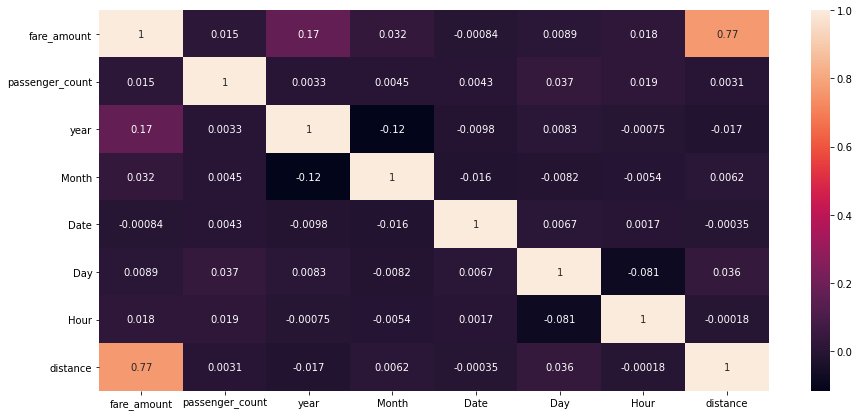

In [125]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

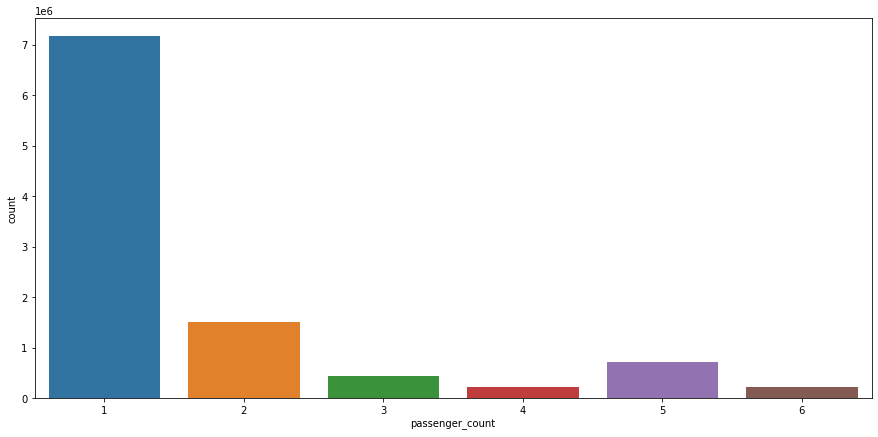

In [126]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

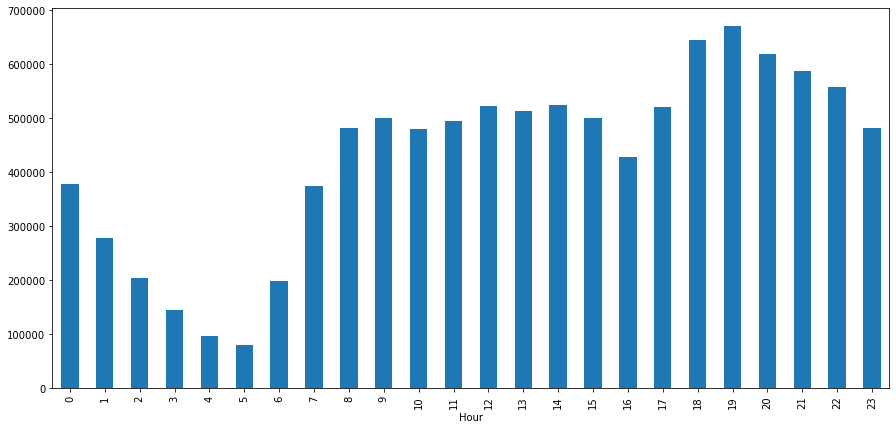

In [127]:
plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Lowest cabs at 5 AM and highest at and around 7 PM i.e the office rush hours

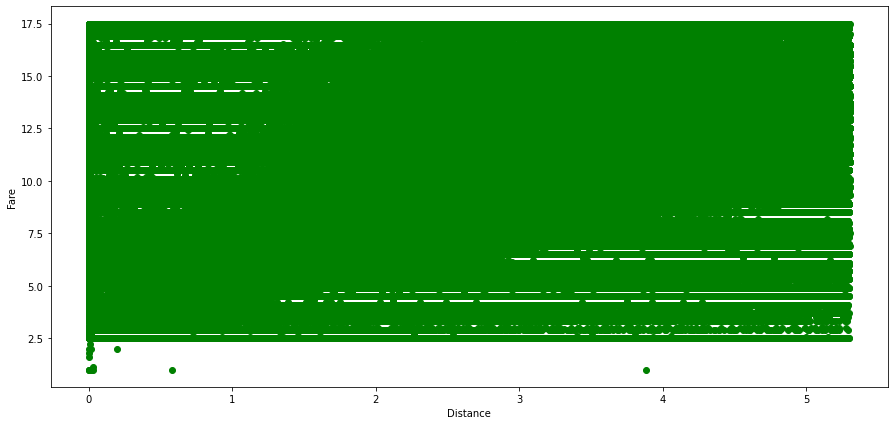

In [128]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

**It is quite obvious that distance will effect the amount of fare**

# Applying ML ALgorithms: 

In [129]:
X = train.drop(['fare_amount','Date'],axis=1).values
y = train['fare_amount'].values

In [130]:
print(X.shape)
print(y.shape)

(10286916, 6)
(10286916,)


In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [133]:
X[:3, :]

array([[-0.52575047, -0.9166264 , -0.07115556, -1.04343379,  1.31096469,
        -0.34181308],
       [ 2.54083178,  0.15506959, -1.52297655,  1.52996412, -1.35402839,
        -0.79222607],
       [ 0.24089509,  1.22676559,  0.50957283,  0.50060496, -0.099914  ,
         0.35802152]])

In [134]:
##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [136]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8229532, 6) (2057384, 6) (8229532,) (2057384,)


### Multiple Linear Regression Model :

In [137]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a Decision reg classifier: reg
reg = LinearRegression()

# Instantiate the gridSearchCV object: reg_cv
reg_cv = GridSearchCV(reg, param_dist, cv=5,scoring='r2')

# Fit it to the data
reg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(reg_cv.best_params_))
print("Best score is {}".format(reg_cv.best_score_))

Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': True}
Best score is 0.6274252897437803


In [138]:
# Building model on top of training dataset
fit_LR = LinearRegression(copy_X= True, fit_intercept=True).fit(X_train , y_train)

In [139]:
fit_LR.score(X_test, y_test)

0.6262770305355656

In [140]:
fit_LR.score(X_train, y_train)

0.6277127407097932

In [141]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [142]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [143]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [144]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 1.9003337820703456
Root Mean Squared Error For Test data = 1.9026546074829536


In [145]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.6277127407097932

In [146]:
r2_score(y_test, pred_test_LR)

0.6262770305355656

**Save model using pickle**

In [189]:
import pickle

In [190]:
f = open('Fare_LR2.pkl','wb')
pickle.dump(fit_LR, f)
f.close()

### Lasso Regression

In [147]:
from sklearn.linear_model import LassoCV

In [148]:
regr = LassoCV()
regr.fit(X_train, y_train)
print(regr.alpha_)
print(regr.score(X_test, y_test))

0.002395192901149098
0.6262754816997838


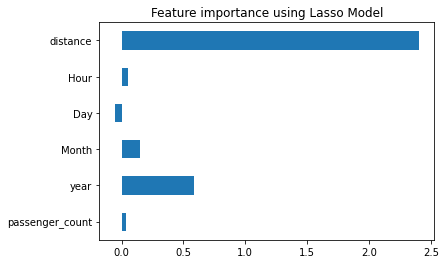

In [149]:
imp_coef = pd.Series(regr.coef_, index=['passenger_count', 'year', 'Month','Day', 'Hour', 'distance'])
#imp_coef = imp_coef.sort_values()
imp_coef.plot(kind='barh')
plt.title("Feature importance using Lasso Model")
plt.show()

In [150]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [172]:
lasso = Lasso(alpha=0.002395192901149098,max_iter = 500)
lasso.fit(X_train,y_train)

Lasso(alpha=0.002395192901149098, max_iter=500)

In [173]:
lasso.score(X_test, y_test)

0.6262754816997838

In [174]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {'alpha':np.logspace(-4, 0, 50)}
# Instantiate a Decision ridge classifier: ridge
ridge = Ridge()

# Instantiate the gridSearchCV object: ridge_cv
ridge_cv = GridSearchCV(ridge, param_dist, cv=3,scoring='r2')

# Fit it to the data
ridge_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision ridge Parameters: {}".format(ridge_cv.best_params_))
print("Best score is {}".format(ridge_cv.best_score_))

Tuned Decision ridge Parameters: {'alpha': 1.0}
Best score is 0.6274254512449511


In [175]:
ridge = Ridge(alpha= 1.0, max_iter=500)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.6262770306797572

### Decision tree Regressor : 

In [176]:
fit_DT = DecisionTreeRegressor(max_depth= 6, min_samples_split=2).fit(X_train,y_train)

In [177]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [178]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [179]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 1.8519514292629695
Root Mean Squared Error For Test data = 1.8541372480018916


In [180]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.6464282315579937

In [181]:
## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.6450937611324816

In [191]:
f = open('Fare_DT2.pkl','wb')
pickle.dump(fit_DT, f)
f.close()